In [1]:
import os, sys
from pathlib import Path

os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
sys.path.append('/home/k64835/Master-Thesis-SITS')

scripts_path = Path("../Data-Preprocessing/").resolve()
sys.path.append(str(scripts_path))

scripts_path = Path("../Data-Preprocessing/Pipeline").resolve()
sys.path.append(str(scripts_path))

scripts_path = Path("../Evaluation/").resolve()
sys.path.append(str(scripts_path))

scripts_path = Path("../Modeling/").resolve()
sys.path.append(str(scripts_path))

In [2]:
import pickle
from scripts.data_visualiser import *
from scripts.data_loader import *
from scripts.data_preprocessor import *
from scripts.temporal_data_preprocessor import *
from scripts.temporal_data_loader import *
from scripts.temporal_visualiser import *
from scripts.temporal_chanel_refinement import *
from Pipeline.temporal_preprocessing_pipeline import *
import numpy as np
import config as config

In [3]:
preprocessing_pipeline = PreProcessingPipelineTemporal()

In [4]:
temp = load_field_images_temporal(config.base_directory_temporal_test1)

In [5]:
np.unique(temp[0][0][...,-1])

array([       0., 20190601.])

In [10]:
field_numbers, acquisition_dates, indices = indexonly_temporal_cubes(temp, 'ndvi')

In [13]:
field_numbers, acquisition_dates, indices = allbands_temporal_cubes(temp)

In [14]:
indices[0][0].shape

(64, 64, 10)

In [8]:
temp[0][0].shape

(64, 64, 13)

In [7]:
acquisition_dates['1168039.0']

['20190601.0',
 '20190619.0',
 '20190704.0',
 '20190716.0',
 '20190808.0',
 '20190818.0',
 '20190904.0']

In [8]:
acquisition_dates[field_numbers[0]]

['20190601.0',
 '20190619.0',
 '20190704.0',
 '20190716.0',
 '20190808.0',
 '20190818.0',
 '20190904.0']

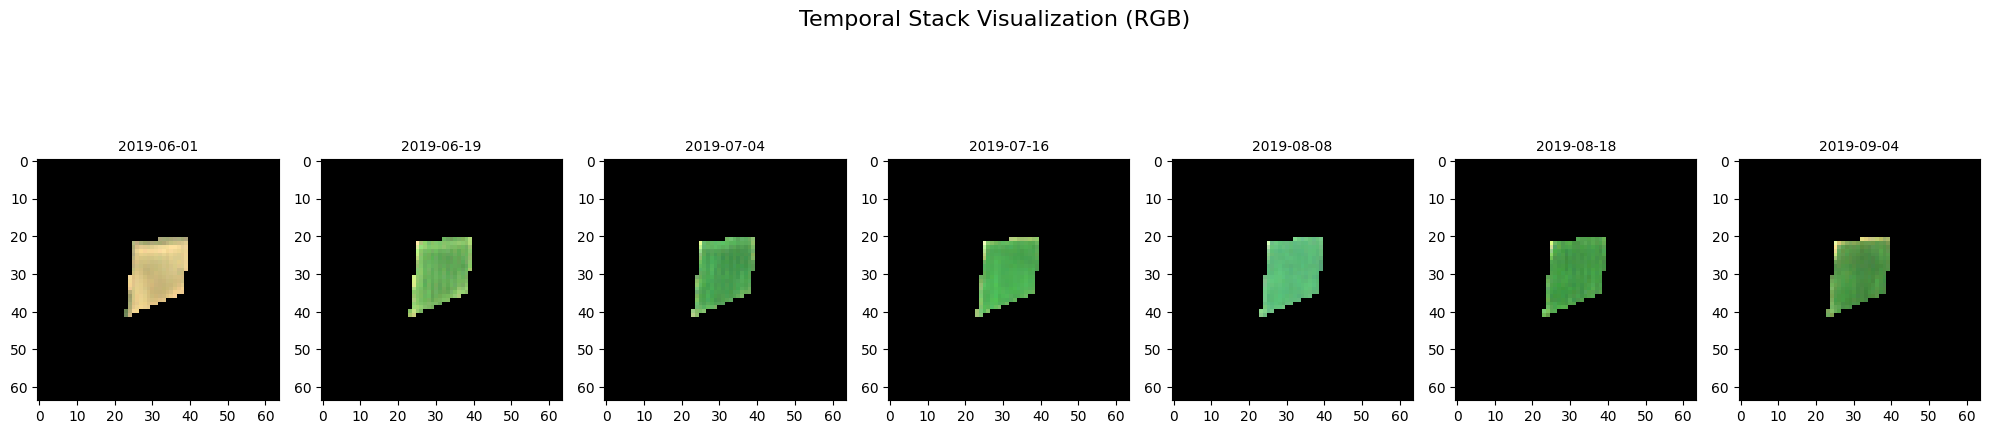

In [15]:
visualize_temporal_stack_rgb1(indices[0],acquisition_dates[field_numbers[0]])

In [5]:
field_numbers, image_tensor = preprocessing_pipeline.get_processed_temporal_cubes('train', 'allbands')

In [7]:
len(image_tensor[0])

7

IndexError: index 10 is out of bounds for axis 2 with size 10

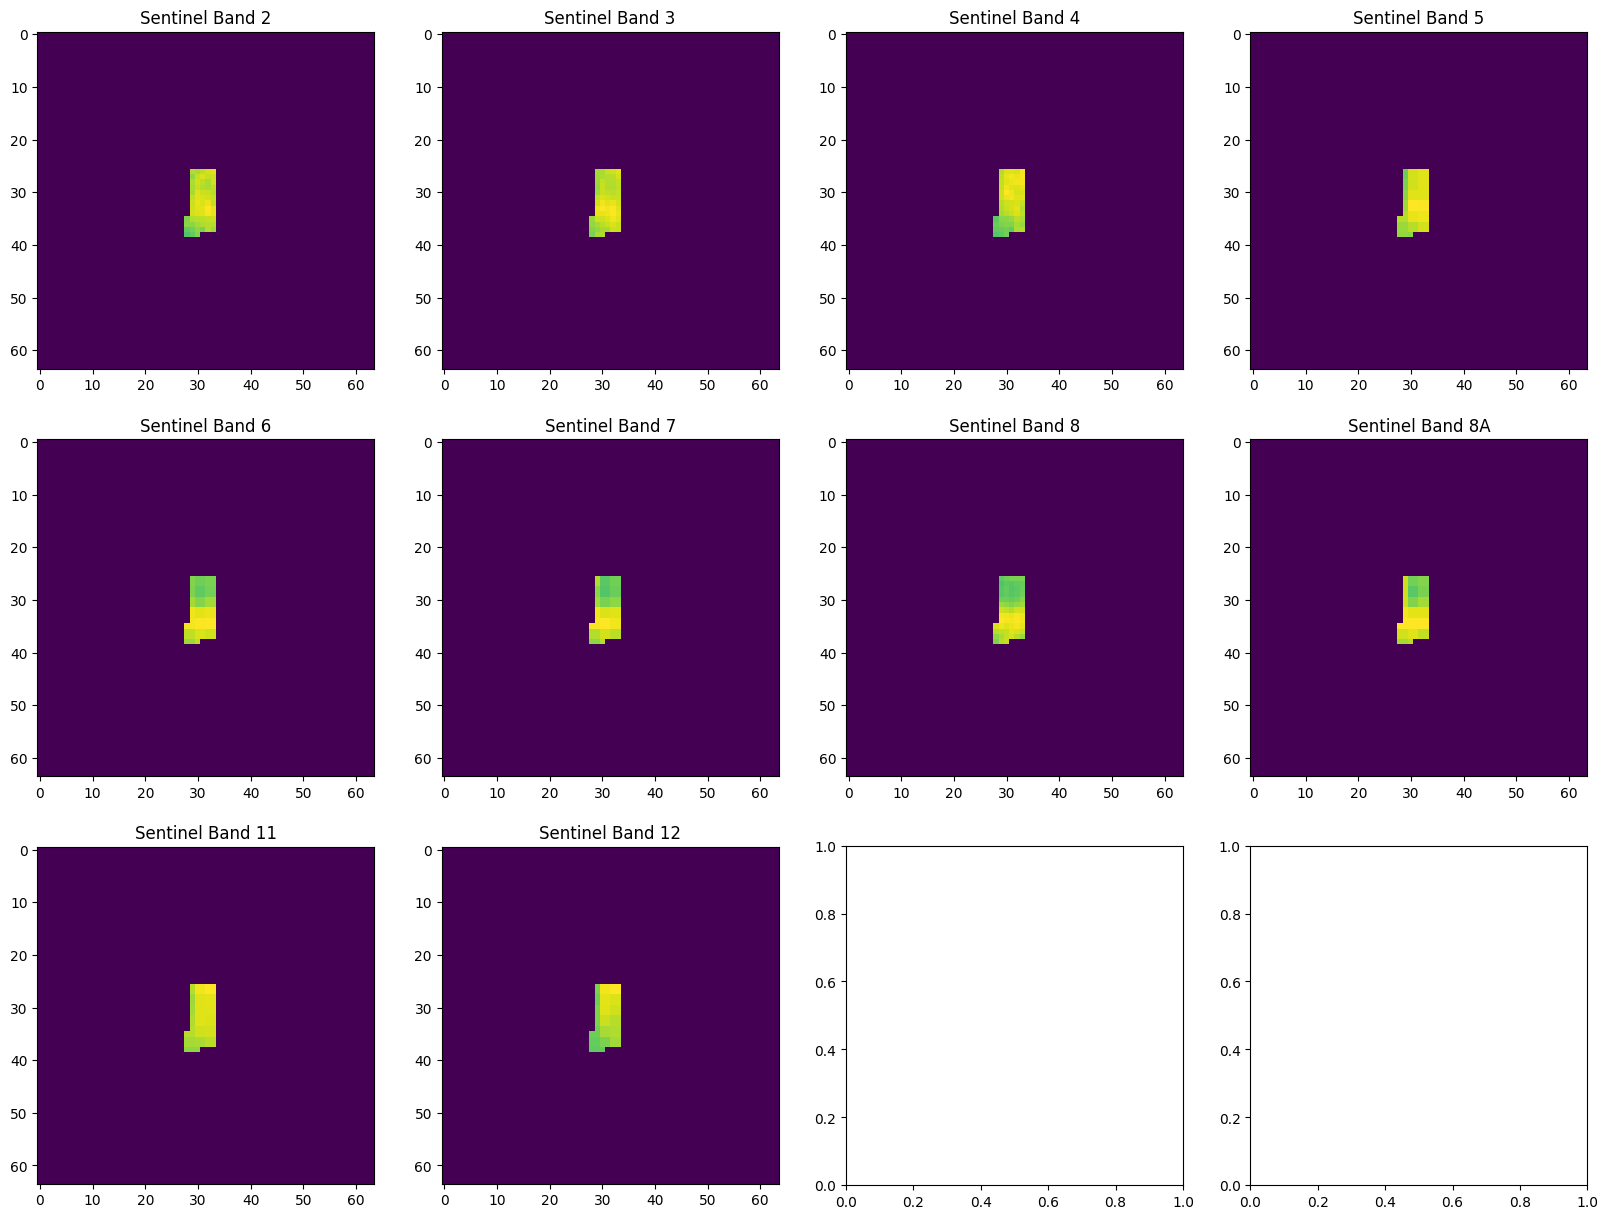

In [9]:
visualise_all_bands(image_tensor[0][0])